In [1]:
#importing required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression

#Data Visualization
import matplotlib.pyplot as plt

In [3]:
data = pd.DataFrame(pd.read_csv('Advertising.csv'))

In [4]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
#dropping or deletting umwanted row from datatset
del data['Unnamed: 0']

In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
data.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [9]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

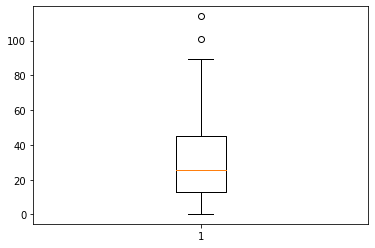

In [10]:
plt1 = plt.boxplot(data['Newspaper'])

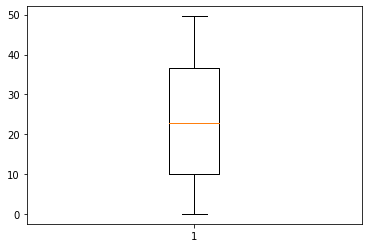

In [11]:
plt2 = plt.boxplot(data['Radio'])

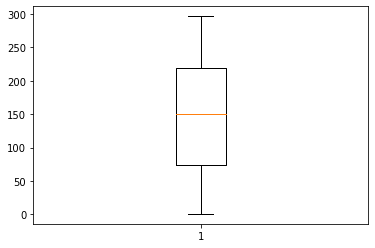

In [12]:
plt3 = plt.boxplot(data['TV'])

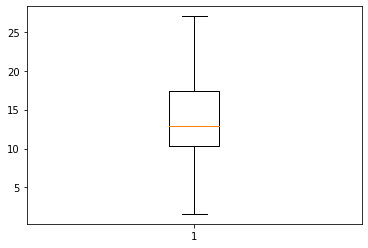

In [13]:
plt4 = plt.boxplot(data['Sales'])

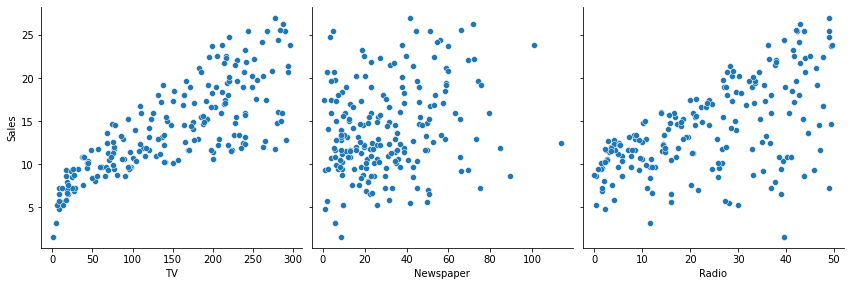

In [14]:
import seaborn as sn
fig1 = sn.pairplot(data , x_vars=['TV', 'Newspaper', 'Radio'] , y_vars = 'Sales' , height = 4 , aspect=1 ,
                   kind='scatter')

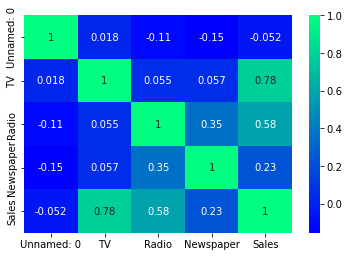

In [15]:
#Correlation between different Variables
fig2 = sn.heatmap(data.corr(), annot = True , cmap = 'winter')

In [17]:
#Building linear regression model 
#let us take tv , radio as input features and sales as target value
input_features = ['TV','Radio']
x = data[input_features]
y= data['Sales']

# Splitting data into train and test datasets
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.7,test_size=0.3)
x_train.head()

,TV,Radio
189,18.7,12.1
110,225.8,8.2
67,139.3,14.5
113,209.6,20.6
51,100.4,9.6


In [18]:
x_test.head()

,TV,Radio
52,216.4,41.7
46,89.7,9.9
66,31.5,24.6
60,53.5,2.0
188,286.0,13.9


In [19]:
#Linear Model
model = LinearRegression()
model = model.fit(x_train,y_train)

In [20]:
y_pred = model.predict(x_test)
print(y_pred)

[20.54692364  8.76154696  8.84518593  5.61670464 18.52978821 13.86431146
 16.90748763 15.47984842  9.58626983 15.11067003 18.32459011 21.18729339
 19.56248652  9.02829628 18.09990019  9.00308687 20.25423477 21.54782492
 13.25948343  9.55709822 23.69033848  5.14798928 16.18492715 20.44476125
 12.18355726 19.06854536  7.53047974 23.14738958  6.67618741 10.20488411
 12.65953246 10.24273101  6.90832188  8.65824018  8.05175514 11.30177876
 14.26113561 15.51093938  8.00924869 19.83824342 16.68452468 19.14090437
 16.26944382  5.2327027  20.16036622 12.79891435 21.46743877 16.9462002
  7.44281299  9.79754292 20.66096059  6.44363431 13.8186101  17.67010619
 17.49041262 18.33122256 24.67679768 11.27519542 11.85179075 19.85990052]


In [21]:
sales_set = x_test
x_test['y_test'] = y_test
x_test['y_pred'] = y_pred
print(x_test)

        TV  Radio  y_test     y_pred
52   216.4   41.7    22.6  20.546924
46    89.7    9.9    10.6   8.761547
66    31.5   24.6     9.5   8.845186
60    53.5    2.0     8.1   5.616705
188  286.0   13.9    15.9  18.529788
43   206.9    8.4    12.9  13.864311
35   290.7    4.1    12.8  16.907488
118  125.7   36.9    15.9  15.479848
186  139.5    2.1    10.3   9.586270
85   193.2   18.4    15.2  15.110670
193  166.8   42.0    19.6  18.324590
55   198.9   49.4    23.7  21.187293
109  255.4   26.9    19.8  19.562487
29    70.6   16.0    10.5   9.028296
153  171.3   39.7    19.0  18.099900
125   87.2   11.8    10.6   9.003087
54   262.7   28.8    20.2  20.254235
30   292.9   28.3    21.4  21.547825
167  206.8    5.2    12.2  13.259483
79   116.0    7.7    11.0   9.557098
198  283.6   42.0    25.5  23.690338
155    4.1   11.6     3.2   5.147989
48   227.2   15.8    14.8  16.184927
0    230.1   37.8    22.1  20.444761
2     17.2   45.9     9.3  12.183557
92   217.7   33.5    19.4  19.068545
3

In [22]:
res = y_pred -y_test
print(res)

52    -2.053076
46    -1.838453
66    -0.654814
60    -2.483295
188    2.629788
43     0.964311
35     4.107488
118   -0.420152
186   -0.713730
85    -0.089330
193   -1.275410
55    -2.512707
109   -0.237513
29    -1.471704
153   -0.900100
125   -1.596913
54     0.054235
30     0.147825
167    1.059483
79    -1.442902
198   -1.809662
155    1.947989
48     1.384927
0     -1.655239
2      2.883557
92    -0.331455
32    -2.069520
147   -2.252610
119    0.076187
72     1.404884
197   -0.140468
158    2.942731
10    -1.691678
143   -1.741760
49    -1.648245
80    -0.498221
171   -0.238864
131    2.810939
24    -1.690751
53    -1.361757
62     0.984525
142   -0.959096
40    -0.330556
195   -2.367297
104   -0.539634
115    0.198914
42     0.767439
187   -0.353800
34    -2.057187
73    -1.202457
185   -1.939039
117   -2.956366
135    2.218610
70    -0.629894
3     -1.009587
14    -0.668777
175   -2.323202
136    1.775195
173    0.151791
176   -0.340099
Name: Sales, dtype: float64


In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [24]:
np.square(mean_squared_error(y_test,y_pred))

7.14244643994459

In [25]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9130566694058846

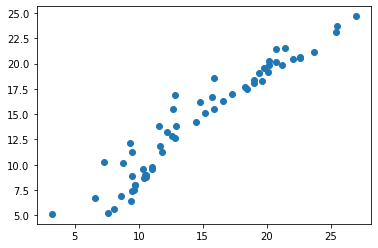

In [26]:
fig = plt.scatter(y_test,y_pred)

In [27]:
new_x = [[230.1,37.8]]
print(model.predict(new_x))

[20.44476125]


C:\Users\nerel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
